In [1]:
import pandas as pd
import numpy as np
import requests
import urllib
import re
from bs4 import BeautifulSoup

In [2]:
#Open the page with all albums.
main_page = 'https://www.azlyrics.com/a/atmosphere.html'
try:
    content = urllib.request.urlopen(main_page).read()
    main_soup = BeautifulSoup(content, 'html.parser')
except Exception as e:
    print('Error'+str(e))
#Pull the list of albums on the page and the associated IDs.
album_list = main_soup.find(id='listAlbum')
albums = [name.string.strip('\"') for name in album_list.findAll('b')]
album_ids = [number.get('id') for number in album_list.findAll(['a']) if len(number)==0]

In [3]:
#Create a dataframe containing each album and the ID
albumdf = pd.DataFrame(data={'AlbumName': albums, 'AlbumID': album_ids})
albumdf

,AlbumID,AlbumName
0,7391,Overcast!
1,5001,Lucy Ford: The Atmosphere EPs
2,5005,God Loves Ugly
3,3262,Seven's Travels
4,7592,Headshots: SE7EN
5,5146,You Can't Imagine How Much Fun We're Having
6,7187,Happy Clown Bad Dub 8 / Fun EP
7,6298,Sad Clown Bad Summer #9
8,7048,Sad Clown Bad Fall #10
9,7050,Sad Clown Bad Winter #11


In [5]:
#Need to implement loop/vectorize (if possible) so it can be done on every album.
album_dicts = dict.fromkeys(albumdf['AlbumID'])
for i,j in enumerate(albumdf['AlbumID']):
    #Find the album
    findalbum = album_list.findAll(class_='album')[i]
    #Initialize song list
    songs = []
    #Find where the song titles begin
    title = findalbum.findNext('a', text=True)
    #Loop through the list until reaching the next album, where there is an ID field.
    if i < len(albumdf)-1:
        while title.get('id') != albumdf['AlbumID'][i+1]:
            songs.append(title.text)
            title = title.findNext('a')
            print(title.text)
        album_dicts[j] = songs
    else:
        while title.text != 'Bar Food':
            songs.append(title.text)
            title = title.findNext('a')
        album_dicts[j] = songs


Brief Description
Current Status
Complications
4:30 AM
Adjust
Clay
Sound Is Vibration
Multiples
Scapegoat
WND
Multiples (Reprise)
Caved In
Cuando Limpia El Humo
The Outernet
Primer

Like Today
Tears For The Sheep
Guns And Cigarettes
Don't Ever Fucking Question That
It Goes
If I Was Santa Claus
Aspiring Sociopath
Free Or Dead
Party For The Fight To Write
Mama Had A Baby And His Head Popped Off
They're All Gonna Laugh @ You
Lost And Found
The Woman With The Tattooed Hands
Nothing But Sunshine
Homecoming

The Bass And The Movement
Give Me
Fuck You Lucy
Hair
Godlovesugly
A Song About A Friend
Flesh
Saves The Day
Lovelife
Breathing
Vampires
A Girl Named Hope
Godlovesugly Reprise
Modern Man's Hustle
One Of A Kind
Blamegame
Shrapnel

Trying To Find A Balance
Bird Sings Why The Caged I Know
Reflections
Gotta Lotta Walls
The Keys To Life Vs. 15 Minutes Of Fame
Apple
Suicidegirls
Jason
Cats Van Bags
Los Angeles
Lift Her Pull Her
Shoes
National Disgrace
Denvemolorado
Liquor Lyles Cool July
Good T

In [7]:
all_songs = [song for sublist in album_dicts.values() for song in sublist]

In [12]:
songdf = pd.DataFrame({'SongName': all_songs})
songdf.head(10)

,SongName
0,Like A Fire
1,Ringo
2,Besos
3,Pure Evil
4,Perfect
5,Seismic Waves
6,Next To You
7,The Shit That We've Been Through
8,When The Lights Go Out
9,No Biggie


In [13]:
songurl = 'https://www.azlyrics.com/lyrics/atmosphere/1597.html'
try:
    song_content = urllib.request.urlopen(songurl).read()
    song_soup = BeautifulSoup(song_content, 'html.parser')
except Exception as e:
    print('Error'+str(e))

In [75]:
s_1597 = song_soup.find('i').next.next.text

In [87]:
pattern = re.compile('[\W_]+')
new_s = pattern.sub(' ', s_1597.lower())
new_s

' hence forth step within my psychoanalysis callouses upon my mind make me strain for my lines out i ripped it squeeeeezed the brain it made some liquid drained it in a cup and then i sipped it atmosphere the mic let me clutch it thoughts take flight so fit the slug in your pipe and take a puff kid fuck it i heat it like a tea pot steam hot upon the roof shoot a marble with the verbal slingshot take aim here i came i m the same back in 86 i da tag my name upon your window pane stained the mind a deep shade of residue voices within the head make choices multiple multiply spawn slug a little buzz and atmosphere the scuds cause here come the judge blasted so past the kid a mic so we can paint this image of the gifted anxious to flip the language it s the noun meltdown from the outer shell now smell the burning flesh fresh from the hell bound and come on down here this mind path i m half mathematic atmospheric staff with the rhyme craft comin to capture your after laughter while i m hangin

In [88]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [89]:
stopword_set = set(stopwords.words('english'))

In [90]:
s_stopped = ' '.join([word for word in new_s.split() if word not in stopword_set])

In [91]:
s_stopped

'hence forth step within psychoanalysis callouses upon mind make strain lines ripped squeeeeezed brain made liquid drained cup sipped atmosphere mic let clutch thoughts take flight fit slug pipe take puff kid fuck heat like tea pot steam hot upon roof shoot marble verbal slingshot take aim came back 86 da tag name upon window pane stained mind deep shade residue voices within head make choices multiple multiply spawn slug little buzz atmosphere scuds cause come judge blasted past kid mic paint image gifted anxious flip language noun meltdown outer shell smell burning flesh fresh hell bound come mind path half mathematic atmospheric staff rhyme craft comin capture laughter hangin rafter rip rapture cause cramps stomach dismantle tamper amplifier damn die talking try sky presents eternally unfolding spectacle one moment puffs cumulous clouds get across next billowing thunderhead perhaps 10 miles high looms horizon probing structure sky try slug cause read emcee front back cover classifie

In [132]:
from collections import Counter
countdict = Counter(new_s.split())
stoppeddict = Counter(s_stopped.split())

In [161]:
onesongdf = pd.DataFrame({'Word': list(countdict.keys())})
stoppeddf = pd.DataFrame({'Word': list(stoppeddict.keys())})

In [162]:
onesongdf['Count'] = onesongdf['Word'].map(countdict)
stoppeddf['Count'] = stoppeddf['Word'].map(stoppeddict)

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

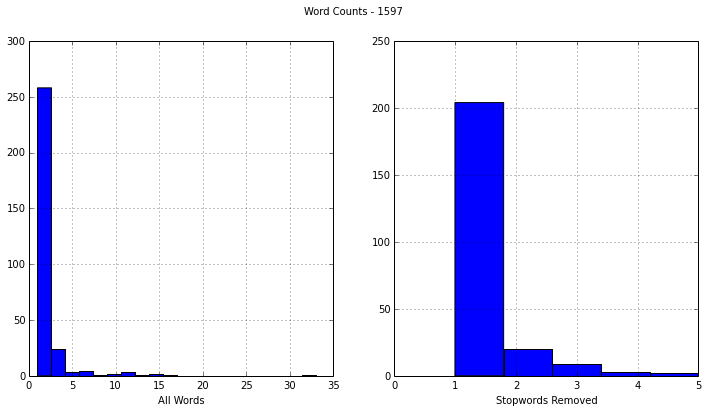

In [172]:
fig, ax = plt.subplots(ncols=2, sharey=False, figsize=(12,6))
onesongdf.sort_values(by='Count', ascending=False, inplace=True)
onesongdf['Count'].hist(ax=ax[0], bins=20)
stoppeddf.sort_values(by='Count', ascending=False, inplace=True)
stoppeddf['Count'].hist(ax=ax[1], bins=5)
ax[1].set_xlim((0,5))
ax[0].set_xlabel('All Words')
ax[1].set_xlabel('Stopwords Removed')
plt.suptitle('Word Counts - 1597')